In [1]:
%matplotlib inline 


import pandas as pd
import numpy as np
import sklearn.model_selection as model_selection
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import sklearn.metrics as metrics


from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


In [2]:
stats2018 = pd.read_csv('Total2018_full')


In [3]:
stats2018.drop('Unnamed: 0', axis = 1, inplace = True)
stats2018.drop('Unnamed: 0.1', axis = 1, inplace = True)

In [4]:
stats2018.head()

,Rk,Tm,2018-19,Name,Pos,G,GS,FG,FG%,3P,...,PER,MP,TRB%,AST%,TOV%,OWS,DWS,M/G,AST/TOV,dollar_per_p/g
0,1,GSW,37457154,Stephen Curry,PG,51,51,8.4,0.495,4.2,...,28.2,1631,9.0,30.3,13.3,7.2,1.8,31.980392,2.033333,1.418832e+06
1,4,HOU,35654150,Chris Paul,PG,58,58,6.3,0.460,2.5,...,24.4,1847,9.5,40.9,12.5,7.5,2.7,31.844828,3.590909,1.916890e+06
2,2,LAL,35654150,LeBron James,PF,82,82,10.5,0.542,1.8,...,28.6,3026,13.1,44.4,16.1,11.0,3.0,36.902439,2.166667,1.296515e+06
3,5,OKC,35350000,Russell Westbrook,PG,80,80,9.5,0.449,1.2,...,24.7,2914,15.3,49.8,16.4,5.5,4.5,36.425000,2.145833,1.391732e+06
4,6,DET,31873932,Blake Griffin,PF,58,58,7.5,0.438,1.9,...,19.6,1970,12.0,28.1,12.6,3.2,1.8,33.965517,2.071429,1.489436e+06


In [5]:
#Reminding what each feature means
feature_names = pd.read_csv('Names_full').drop('Unnamed: 0', axis =1)
feature_names

,Abbreviation,Meaning
0,Rk,Rank
1,Tm,Team
2,2018-19,Salary for 2018-19 season
3,Name,Name
4,Pos,Position
5,G,Games Played
6,GS,Games Started
7,FG,Field Goals Attempted
8,FG%,Field Goal Percentage
9,3P,3 Pointers Attempted per Game


In [6]:
target = stats2018['2018-19'] #target variable, the salary

In [7]:
features = stats2018.drop('2018-19', axis = 1)

In [8]:
features.columns

Index(['Rk', 'Tm', 'Name', 'Pos', 'G', 'GS', 'FG', 'FG%', '3P', '3P%', 'eFG%',
       'FT%', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'PS/G', 'TOV', 'Age', 'WS',
       'PER', 'MP', 'TRB%', 'AST%', 'TOV%', 'OWS', 'DWS', 'M/G', 'AST/TOV',
       'dollar_per_p/g'],
      dtype='object')

In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 31 columns):
Rk                377 non-null int64
Tm                377 non-null object
Name              377 non-null object
Pos               377 non-null object
G                 377 non-null int64
GS                377 non-null int64
FG                377 non-null float64
FG%               377 non-null float64
3P                377 non-null float64
3P%               352 non-null float64
eFG%              377 non-null float64
FT%               370 non-null float64
ORB               377 non-null float64
TRB               377 non-null float64
AST               377 non-null float64
STL               377 non-null float64
BLK               377 non-null float64
PS/G              377 non-null float64
TOV               377 non-null float64
Age               377 non-null int64
WS                377 non-null float64
PER               377 non-null float64
MP                377 non-null int64
TRB%       

There are a few missing values in the FT% and 3P% columns. This is most likely from the player not taking any free throws or 3-pointers, which is not uncommon depending on the amount and position a player plays. I will leave these be for now, until I use them in a regression.

As I decided earlier in the "EDA" portion of this project, Points per game (PS/G), games started (GS), and Win Shares (WS) were the 3 most correlative features with salary, so I will slice the 'features' dataframe for these three only.

In [10]:
features_important = features[['GS','PS/G','WS']]
features_important.head()

,GS,PS/G,WS
0,51,26.4,9.1
1,58,18.6,10.2
2,82,27.5,14.0
3,80,25.4,10.1
4,58,21.4,4.9


### Using an Ordinary Least Squares Fit as the regression with only 1 variable, points per game

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [12]:
#Trying a regression with only 1 variable, the most correlated 
m1 = ols('Q("2018-19") ~ Q("PS/G")',stats2018).fit()

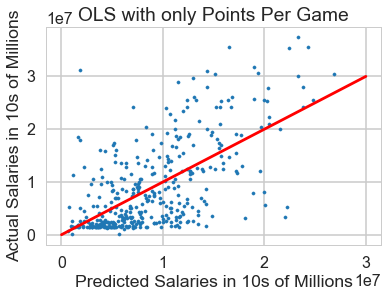

In [13]:
_ = plt.scatter(m1.fittedvalues, target, s = 10)
_ = plt.xlabel('Predicted Salaries in 10s of Millions')
_ = plt.ylabel('Actual Salaries in 10s of Millions')
_ = plt.title('OLS with only Points Per Game')
_ = plt.plot([0,3e7],[0,3e7], color = 'r')

In [14]:
MSE = metrics.mean_squared_error(target, m1.fittedvalues)
MSE

40449420938585.6

In [15]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q("2018-19")   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     256.0
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           2.72e-44
Time:                        10:32:30   Log-Likelihood:                -6440.8
No. Observations:                 377   AIC:                         1.289e+04
Df Residuals:                     375   BIC:                         1.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.084e+05   6.36e+05      0.171      0.865   -1.14e+06    1.36e+06
Q("PS/G")   8.794e+05    5.5e+04     16.000      0.000    7.71e+05    9.87e+05
==============================================================================
Omnibus:                       41.097   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.558
Skew:                           0.727   Prob(JB):                     7.08e-14
Kurtosis:                       4.318   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see, the Mean-Squared Error is very high at 40$\times$ $10^{12}$ and the $R^2$ value is pretty low at 0.406. Although this is low, it is not altogether bad, judging by the fact that this is a univariate regression, and this 1 feature can predict 40% of the variance in the salary. 

### Trying OLS with 3 important variables

In [16]:
m2 = ols('Q("2018-19") ~ Q("PS/G") + GS + WS',stats2018).fit()

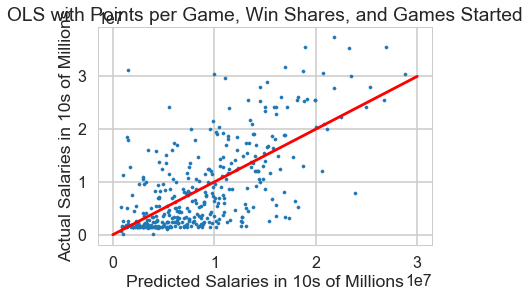

In [17]:
_ = plt.scatter(m2.fittedvalues, target, s = 10)
_ = plt.xlabel('Predicted Salaries in 10s of Millions')
_ = plt.ylabel('Actual Salaries in 10s of Millions')
_ = plt.title('OLS with Points per Game, Win Shares, and Games Started')
_ = plt.plot([0,3e7],[0,3e7], color = 'r')

In [18]:
MSE2 = metrics.mean_squared_error(target, m2.fittedvalues)
MSE2

37094922259158.62

In [19]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q("2018-19")   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           7.23e-49
Time:                        10:32:31   Log-Likelihood:                -6424.5
No. Observations:                 377   AIC:                         1.286e+04
Df Residuals:                     373   BIC:                         1.287e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.755e+05   6.14e+05      0.775      0.439   -7.31e+05    1.68e+06
Q("PS/G")   4.994e+05   8.42e+04      5.933      0.000    3.34e+05    6.65e+05
GS          4.654e+04   1.61e+04      2.896      0.004    1.49e+04    7.81e+04
WS          6.373e+05   1.69e+05      3.776      0.000    3.05e+05    9.69e+05
==============================================================================
Omnibus:                       55.997   Durbin-Watson:                   0.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.614
Skew:                           0.860   Prob(JB):                     3.86e-22
Kurtosis:                       4.822   Cond. No.                         86.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Just by using a simple OLS with 3 varibles instead of 1, the $R^2$ value increase by half a decimal point. Neither is very good yet. One thing to note is that the **Skew** and the **Kurtosis** on this second OLS have increased. The higher kurtosis value means that it is more leptokurtic, resulting in more outliers. However, the Skewness is still less than the common threshold value of 1, which means that, though not symmetric, it is still not abundantly so. The F-statistic also drastically decreased by about half. Both F-statistics are very high though, so this model can still be deemed as statistically significant.

### Trying OLS with the second run in the Inferential Statistics portion of the project when I slowly removed a feature until they were all significant

In [20]:
m_all = ols('Q("2018-19") ~ G + AST + Q("PS/G") + WS + Q("AST%")',stats2018).fit()

In [21]:
MSE3 = metrics.mean_squared_error(target, m_all.fittedvalues)
MSE3

33763036149101.55

In [22]:
m_all.rsquared

0.5039385820964951

In [23]:
m_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q("2018-19")   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     75.38
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           2.30e-54
Time:                        10:32:33   Log-Likelihood:                -6406.8
No. Observations:                 377   AIC:                         1.283e+04
Df Residuals:                     371   BIC:                         1.285e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.782e+06   1.14e+06      5.970      0.000    4.55e+06    9.02e+06
G          -9.547e+04   1.66e+04     -5.748      0.000   -1.28e+05   -6.28e+04
AST         2.481e+06   6.09e+05      4.077      0.000    1.28e+06    3.68e+06
Q("PS/G")    4.58e+05   8.85e+04      5.173      0.000    2.84e+05    6.32e+05
WS          1.112e+06   1.74e+05      6.398      0.000    7.71e+05    1.45e+06
Q("AST%")  -4.218e+05   1.07e+05     -3.958      0.000   -6.31e+05   -2.12e+05
==============================================================================
Omnibus:                       26.562   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.113
Skew:                           0.550   Prob(JB):                     2.37e-08
Kurtosis:                       4.013   Cond. No.                         256.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This time, the skew and Kurtosis both decreased. This leads me to believe that this may be the best model for me to use for a testing split. The $R^{2}$ value increased by another 0.05, and the F-statistic decreased by a lot, but judging by how large that value is, this model is still statistically significant. The p-values all remain around 0, meaning they are all significant to the model. 

The largest coefficient belongs to the AST category, at 2,481,000, meaning if all else held constant, increasing your assists by 1, you will earn an added \$2,481,000. This makes sense because, on average, players average a lot less assists than points and rebounds. The league leader in Assists last year was Russell Westbrook, who averaged 10.3, the only player with over 10 assists per game, while the highest points per game was James Harden with 30.4 and rebounds was Andre Drummond with 16.0. So pound for pound, assists are hardest to increase.

It was surprising to see that Games Played had a negative coefficient, meaning with all else held constant, increasing the number of games you play by 1 will decrease your salary by \$95,470. I believe, that though this is an interesting revelation, it makes sense as a player who can average more points and get more WS in less games is more valuable than a player who can do the same over an increased number of games. 

Even with this model though, only about 50% of the variance in the salary can be predicted with Games Played, Assists, Points prer game, Win Shares, and Assist Percentage. 

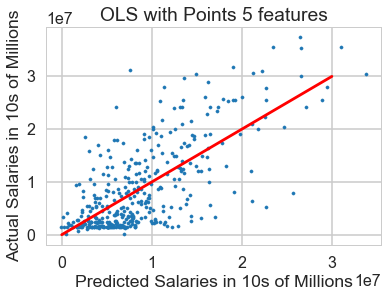

In [24]:
_ = plt.scatter(m_all.fittedvalues, target, s = 10)
_ = plt.xlabel('Predicted Salaries in 10s of Millions')
_ = plt.ylabel('Actual Salaries in 10s of Millions')
_ = plt.title('OLS with Points 5 features')
_ = plt.plot([0,3e7],[0,3e7], color = 'r')

The scatter plot looks a bit better, with the flat floor ending sooner than it did in the previous 2. 

These "flat floors" where the fitted value is predicted to be higher than the actual, which is close to 0, is most likely caused by the minimum salary that player's can be paid, where player's with all different types of stats are all paid the same amount because of the minimum salary. This salary is around \$1,300,000, which is offered to players who have signed a 1 year contract. There are 25 players who were paid this 1 year contract. There are also 6 players who were paid less than this amount, which is reserved for the players that did not sign a full-year contract with the NBA, but rather a two-way contract with the NBA team and it's respective G-League (developmental) team. 

In [25]:
len(stats2018.loc[stats2018['2018-19'] == 1378242])

25

In [26]:
len(stats2018.loc[stats2018['2018-19'] < 1378242])

6

In [27]:
shuffled = stats2018.sample(frac = 1, random_state =5)

For some reason, running the Cross Validation with unshuffled data was resulting in extremely negative scores (the largest was -4,000), but after shuffling the data and then returning it to the cv, I recieved much better scores. I believe that this is because the cross validator splits the data into chunks based on the order that they are in, which is in greatest salary first. So some samples will have stronger or no correlation at all. For example, the 25 players all with the same minimum salary will be grouped into one CV set, even though they all have different stats. Therefore, in that bin, there can be no correlation with the salary. 

In [28]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(shuffled[['G','AST','WS','AST%','PS/G']], shuffled['2018-19'], test_size=0.3, random_state=42)

In [29]:
x_train = sm.add_constant(X_train) #adding the intercept so that it doesn't go 
                                    #straight through 0 if the data doesn't point that way

In [30]:
model = sm.OLS(y_train, X_train)

In [31]:
results = model.fit()

In [32]:
predictions = results.predict(X_test)

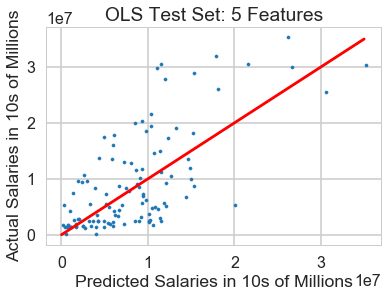

In [33]:
_ = plt.scatter(predictions, y_test, s = 10)
_ = plt.xlabel('Predicted Salaries in 10s of Millions')
_ = plt.ylabel('Actual Salaries in 10s of Millions')
_ = plt.title('OLS Test Set: 5 Features')
_ = plt.plot([0,3.5e7],[0,3.5e7], color = 'r')

In [34]:
np.corrcoef(y_test, predictions)[0,1]**2 

0.47437856660545297

In [35]:
MSEtts = metrics.mean_squared_error(y_test, predictions)
MSEtts

39953960847143.9

Using the same OLS but with a train and test split, I get an $R^2$ value of 0.47. I also get a mean squared error of $40 \times 10^{12}$. This means that 47% of the testing set's variance in salary was predicted using these 5 features, yet the mean squared error increased, even with 30% of the points as the previous models. 

### Using a Linear Regression model with the 5 features used in last OLS

In [36]:
X = shuffled[['G', 'AST', 'PS/G', 'WS' ,'AST%']] 
target2 = shuffled['2018-19']

In [37]:
from sklearn import linear_model
from sklearn import model_selection

reg = linear_model.LinearRegression()


In [38]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, target2, test_size = 0.3, random_state = 42)

In [39]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
y_pred = reg.predict(X_test).reshape(-1,1)

In [41]:
reg.score(X_test, y_test)

0.5078665233094218

In [42]:
MSE_lin = metrics.mean_squared_error(y_pred, y_test)
MSE_lin

36740477313695.53

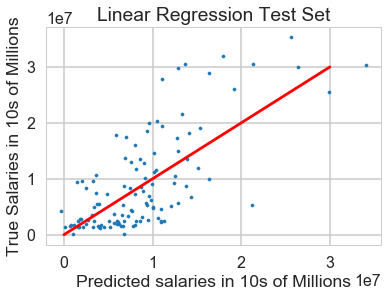

In [43]:
_ = plt.scatter(y_pred, y_test, s = 10)
_ = plt.xlabel('Predicted salaries in 10s of Millions')
_ = plt.ylabel('True Salaries in 10s of Millions')
_ = plt.title('Linear Regression Test Set')
_ = plt.plot([0,3e7],[0,3e7], color = 'r')

Trying with cross validation. The purpose of this is that 'train_test_split' has very high variance, meaning the $R^2$ value can be very different depending on which datapoints were chosen for the training set and which were chosen for the testing set. Cross Validation does this multiple times using each section as a test set, so that every point is eventually used as both a testing and a training set. 

In [58]:
cv_results = model_selection.cross_val_score(reg, X, target2, cv = 10)
cv_results.mean()

0.453372435591023

The results are scored with a $R^2$ metric, which is between 0 (for no correlation) and 1 (perfect correlation), so this model is at least somewhat effective at predicting the salaries of the player. 

### Going to try Lasso Regression and Cross Validate for different Meta-Parameters

In [59]:
X_las = shuffled.drop(['2018-19', 'Pos','Name','Tm','Rk','dollar_per_p/g'], axis = 1)
y_las = shuffled['2018-19']

For this Lasso Regression, I figure that I will try with all of the variables besides the ones that directly use the salary column to find their value (dollar_per_p/g and Rk). I also remove the categorical columns such as Pos and Tm.

In [60]:
#Filling in the missing values with the median value. Since the distributions were non-normal, the median makes more sense 
#to fill the missing values with than the mean. 
for col in X_las.columns:
    X_las[col].fillna(X_las[col].median(), inplace = True)


In [61]:
alphas = [0.001,0.1, 1, 10, 50, 1000]

In [62]:
from sklearn.linear_model import Lasso

results = []
for alpha in alphas:
    lasso = Lasso(alpha = alpha, tol = 0.5)
    lasso_cv = model_selection.cross_val_score(lasso, X_las, y_las, cv= 10)
    print(lasso_cv.mean(), alpha)


0.44088564347254133 0.001
0.4408857094730421 0.1
0.44088630946894514 1
0.44089230857086353 10
0.44091895239149076 50
0.4415324033190814 1000


Since my dataset is not that large, the score with the different alphas does not differ all that much. The score does seem to get a little bit better when $\alpha$ increases, so in the following model, I will choose $\alpha = 1000$. Lasso Regression is typically used for very large matrices, somtimes up to thousands of features. So it makes sense that optimizing the regression does not change the results very significantly.

In [63]:
lasso_best = Lasso(alpha = 1000, tol = 0.5)
Xl_train, Xl_test, yl_train, yl_test = model_selection.train_test_split(X_las, y_las, test_size = 0.3, random_state = 42)
lasso_best.fit(Xl_train, yl_train)
y_pred_lasso = lasso_best.predict(Xl_test)

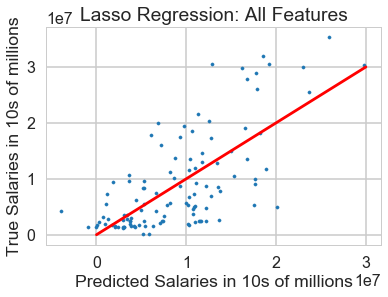

In [64]:
_ = plt.scatter(y_pred_lasso, yl_test, s = 10)
_ = plt.plot([0,3e7],[0,3e7], color = 'r')
_ = plt.xlabel('Predicted Salaries in 10s of millions')
_ = plt.ylabel('True Salaries in 10s of millions')
_ = plt.title('Lasso Regression: All Features')

In [65]:
lasso_best.score(Xl_test,yl_test)

0.48505257173606986

In [66]:
results_lasso = model_selection.cross_val_score(lasso_best, X_las, y_las, cv= 10)
results_lasso.mean()

0.4415324033190814

In [67]:
MSE_lasso = metrics.mean_squared_error(y_pred_lasso, yl_test)
MSE_lasso

38443664578770.555

### Lasso Regression has improved the score to 0.485 (0.441 from Cross-Validation), which is down from 0.45, but reduced the MSE to about $38 \times 10^{12}$, which is still very high, but lower than $37 \times 10^{12}$, which is what I got from the normal Linear Regression.

There is 1 point that was predicted as a negative salary. This true value of this salary is actually incredibly low. As we saw in the histograms and scatter plots, salaries had a hard floor because of the minimum salary that players can be paid, so even if their stats should make them be paid less, they were paid that amount, and the regression is predicted that salary as negative. 

### Using a Ridge Regression model 

In [68]:
from sklearn.linear_model import Ridge

results = []
for alpha in alphas:
    ridge = Ridge(alpha = alpha, tol = 0.5)
    ridge_cv = model_selection.cross_val_score(ridge, X_las, y_las, cv= 10)
    print(ridge_cv.mean(), alpha)

0.4544669785138929 0.001
0.4574934443393305 0.1
0.4694030808860953 1
0.48721871840012615 10
0.4949210787145102 50
0.49984247509008206 1000


In ridge reression, $\alpha$ actually makes a bit of a difference, going from 0.45 to 0.49. Still not much, but much more than the change in Lasso Regression. 

In [69]:
ridge_best = Ridge(alpha = 1000, tol = 0.5)
Xr_train, Xr_test, yr_train, yr_test = model_selection.train_test_split(X_las, y_las, test_size = 0.3, random_state = 42)
ridge_best.fit(Xr_train, yr_train)
y_pred_ridge = ridge_best.predict(Xr_test)

In [70]:
ridge_best.score(Xr_test, yr_test)

0.5258904423823276

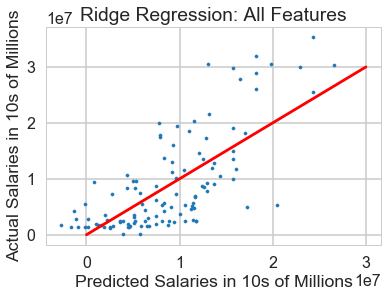

In [71]:
_ = plt.scatter(y_pred_ridge, yr_test, s = 10)
_ = plt.plot([0, 3e7],[0,3e7], color = 'r')
_ = plt.title('Ridge Regression: All Features')
_ = plt.xlabel('Predicted Salaries in 10s of Millions')
_ = plt.ylabel('Actual Salaries in 10s of Millions')

In [72]:
ridge_score = model_selection.cross_val_score(ridge_best, X_las, y_las, cv= 10)
ridge_score.mean()

0.49984247509008206

In [73]:
MSE_ridge = metrics.mean_squared_error(y_pred_ridge, yr_test)
MSE_ridge

35394892383657.67

#### The model yielded a better performing model, but not by much. The score from cross validation was about 0.50 in this regression. The MSE is also still around $30 \times 10^{12}$. 

### From these regressions, you can tell that these regressions are all peaking at explaining about 50% of the variance in salary, but changing and optimizing them does not seem to aid me in predicting the players' salaries. The best model after using a train and test set was the Ridge Regression with all variables besides the categorical ones, which resulted in an $R^2$ of 0.50, and a MSE of $35 \times 10^{12}$, which are the highest and lowest of the test sets, respectively. This is why I have opted to use Ridge Regression for my next step in adding teams to my regression


Now I am going to try the Ridge Regression again, except with dummy variables obtained from the "Tm" column, since I concluded that being on different teams can actually cause a significant difference in salary. 

In [74]:
with_tm = shuffled.drop(['Pos','Name','Rk','dollar_per_p/g'], axis = 1)
with_tm.head()

,Tm,2018-19,G,GS,FG,FG%,3P,3P%,eFG%,FT%,...,WS,PER,MP,TRB%,AST%,TOV%,OWS,DWS,M/G,AST/TOV
90,HOU,13500375,69,30,6.0,0.428,3.2,0.359,0.540,0.809,...,4.7,15.2,2154,4.4,11.7,10.8,2.9,1.8,31.217391,1.157895
286,DEN,2166360,25,3,1.2,0.387,0.6,0.280,0.480,0.833,...,0.4,9.7,277,11.0,5.9,10.1,0.2,0.1,11.080000,1.250000
52,NYK,18622514,71,71,5.9,0.592,0.0,0.000,0.592,0.848,...,7.6,24.0,1830,23.6,9.4,13.3,5.5,2.1,25.774648,0.882353
330,HOU,1544951,1,0,2.0,0.400,0.0,NaN,0.400,NaN,...,-0.1,-3.2,22,10.2,6.4,37.5,-0.1,0.0,22.000000,0.333333
316,POR,1621415,41,0,1.5,0.390,1.0,0.400,0.519,0.724,...,0.3,9.0,523,6.5,11.1,13.5,0.1,0.3,12.756098,1.666667


In [75]:
simplify_tm = {
    "GSW": "1st tier",
    "OKC": "1st tier",
    "WAS": "1st tier",
    "TOR": "1st tier",
    "MIA": "1st tier",
    "POR": "2nd tier",
    "DEN": "2nd tier",
    "HOU": "2nd tier",
    "MIN": "2nd tier",
    "CHO": "2nd tier",
    "CLE": "3rd tier",
    "MEM": "3rd tier",
    "DAL": "3rd tier",
    "NOP": "3rd tier",
    "BOS": "3rd tier",
    "DET": "4th tier",
    "LAL": "4th tier",
    "SAS": "4th tier",
    "BRK": "4th tier",
    "ORL": "4th tier",
    "NYK": "5th tier",
    "UTA": "5th tier",
    "IND": "5th tier",
    "PHI": "5th tier",
    "LAC": "5th tier",
    "MIL": "6th tier",
    "ATL": "6th tier",
    "CHI": "6th tier",
    "PHO": "6th tier",
    "SAC": "6th tier",
}

In [76]:
with_tm['Tm_Rk'] = with_tm['Tm'].map(simplify_tm)
with_tm_rk = with_tm.drop('Tm', axis = 1)

In [77]:
with_dummies = pd.get_dummies(with_tm_rk, columns = ['Tm_Rk'])
with_dummies.head()

,2018-19,G,GS,FG,FG%,3P,3P%,eFG%,FT%,ORB,...,OWS,DWS,M/G,AST/TOV,Tm_Rk_1st tier,Tm_Rk_2nd tier,Tm_Rk_3rd tier,Tm_Rk_4th tier,Tm_Rk_5th tier,Tm_Rk_6th tier
90,13500375,69,30,6.0,0.428,3.2,0.359,0.540,0.809,0.4,...,2.9,1.8,31.217391,1.157895,0,1,0,0,0,0
286,2166360,25,3,1.2,0.387,0.6,0.280,0.480,0.833,0.7,...,0.2,0.1,11.080000,1.250000,0,1,0,0,0,0
52,18622514,71,71,5.9,0.592,0.0,0.000,0.592,0.848,3.8,...,5.5,2.1,25.774648,0.882353,0,0,0,0,1,0
330,1544951,1,0,2.0,0.400,0.0,NaN,0.400,NaN,1.0,...,-0.1,0.0,22.000000,0.333333,0,1,0,0,0,0
316,1621415,41,0,1.5,0.390,1.0,0.400,0.519,0.724,0.1,...,0.1,0.3,12.756098,1.666667,0,1,0,0,0,0


This should add 5 columns. For the purpose of this regression, I split the players into 6 tiers, based on how high their average salaries were. I removed the original 'Tm' column. 

In [78]:
#filling in the missing values
for col in with_dummies.columns:
    with_dummies[col].fillna(with_dummies[col].median(), inplace = True)
with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 90 to 355
Data columns (total 33 columns):
2018-19           377 non-null int64
G                 377 non-null int64
GS                377 non-null int64
FG                377 non-null float64
FG%               377 non-null float64
3P                377 non-null float64
3P%               377 non-null float64
eFG%              377 non-null float64
FT%               377 non-null float64
ORB               377 non-null float64
TRB               377 non-null float64
AST               377 non-null float64
STL               377 non-null float64
BLK               377 non-null float64
PS/G              377 non-null float64
TOV               377 non-null float64
Age               377 non-null int64
WS                377 non-null float64
PER               377 non-null float64
MP                377 non-null int64
TRB%              377 non-null float64
AST%              377 non-null float64
TOV%              377 non-null float64
OWS    

In [79]:
#I drop the 6th tier to act as a baseline. If all of the other ones are 0, then that one must be 1.
with_dummies_drop = with_dummies.drop('Tm_Rk_6th tier', axis = 1)
with_dummies_drop.head()

,2018-19,G,GS,FG,FG%,3P,3P%,eFG%,FT%,ORB,...,TOV%,OWS,DWS,M/G,AST/TOV,Tm_Rk_1st tier,Tm_Rk_2nd tier,Tm_Rk_3rd tier,Tm_Rk_4th tier,Tm_Rk_5th tier
90,13500375,69,30,6.0,0.428,3.2,0.3590,0.540,0.8090,0.4,...,10.8,2.9,1.8,31.217391,1.157895,0,1,0,0,0
286,2166360,25,3,1.2,0.387,0.6,0.2800,0.480,0.8330,0.7,...,10.1,0.2,0.1,11.080000,1.250000,0,1,0,0,0
52,18622514,71,71,5.9,0.592,0.0,0.0000,0.592,0.8480,3.8,...,13.3,5.5,2.1,25.774648,0.882353,0,0,0,0,1
330,1544951,1,0,2.0,0.400,0.0,0.3505,0.400,0.7715,1.0,...,37.5,-0.1,0.0,22.000000,0.333333,0,1,0,0,0
316,1621415,41,0,1.5,0.390,1.0,0.4000,0.519,0.7240,0.1,...,13.5,0.1,0.3,12.756098,1.666667,0,1,0,0,0


In [80]:
X_Tm_train, X_Tm_test, y_Tm_train, y_Tm_test = model_selection.train_test_split(with_dummies_drop.drop('2018-19', axis = 1), with_dummies_drop['2018-19'], test_size = 0.3, random_state = 42)


In [81]:
ridge_best.fit(X_Tm_train, y_Tm_train)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.5)

In [82]:
pred2 = ridge_best.predict(X_Tm_test)

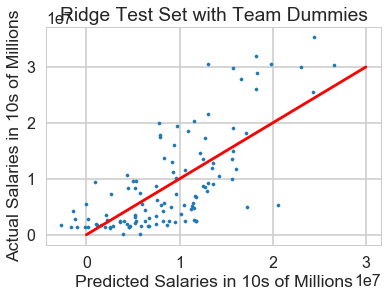

In [83]:
_ = plt.scatter(pred2, y_Tm_test, s = 10)
_ = plt.xlabel('Predicted Salaries in 10s of Millions')
_ = plt.ylabel('Actual Salaries in 10s of Millions')
_ = plt.title('Ridge Test Set with Team Dummies')
_ = plt.plot([0,3e7],[0,3e7], color = 'r')

In [84]:
ridge_best.score(X_Tm_test, y_Tm_test)

0.5265161848563664

In [85]:
ridge_tm = model_selection.cross_val_score(ridge_best, with_dummies_drop.drop('2018-19',axis = 1), with_dummies_drop['2018-19'], cv= 10)
ridge_tm.mean()

0.5009849011493432

In [86]:
metrics.mean_squared_error(y_Tm_test, pred2)

35348177258065.66

The score is just barely better than before I added the team variables, but the mean squared error increased again, so I am inclined to say that the Ridge Regression, without the dummy variables from the teams, is better overall. This regression also yields the most amount of negative values.

In [87]:
#Making a list with values that do not go below the minimum contract value of pay. 
pred_min = []
for sal in pred2:
    if sal > 1378242:
        pred_min.append(sal)
    if sal < 1378242:
        pred_min.append(1378242)


In [88]:
np.corrcoef(pred_min, y_Tm_test)[0,1]**2

0.5445110657760929

In [89]:
MSE_noneg = metrics.mean_squared_error(pred_min, y_Tm_test)
MSE_noneg

34446283104009.18

When replacing the predictions that yielded less than the minimum value of the salary column, I increase my $R^{2}$ value to 0.544 and a MSE of $34.4 \times 10^{12}$. This is a large improvement, especially in the $R^{2}$ value.

I am going to try another method of getting rid of the negative values. Instead of transforming my predictions after they have already been made, I will transform my target variable, to be the log of the salary. I will then predict this transformed target variable, and once I have my predictions, I can untransform them using $e^{x}$ to make sure no values will come out as negative.

In [90]:
log_salaries = np.log(with_dummies_drop['2018-19']) #creating the transformed target variable 

In [91]:
X_log_train, X_log_test, y_log_train, y_log_test = model_selection.train_test_split(with_dummies_drop.drop('2018-19', axis = 1), log_salaries, test_size = 0.3, random_state = 42)


In [92]:
ridge_best.fit(X_log_train, y_log_train)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.5)

In [93]:
log_pred = ridge_best.predict(X_log_test) #predicting the transformed salaries. This is before I take the exponential

In [94]:
unlog_pred = np.exp(log_pred) #taking the exponential for each value in the series

In [95]:
y_test_unlog = np.exp(y_log_test) #taking the exponential for each transformed y_test

In [96]:
np.corrcoef(unlog_pred, y_test_unlog)[0,1]**2 #finding the correlation coefficient (the score) between the untransformed
                                            # predictions and the untransformed test set. 

0.568005797502676

In [97]:
MSElog = metrics.mean_squared_error(unlog_pred,y_test_unlog)
MSElog

34952686752199.836

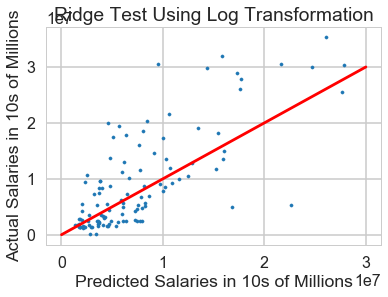

In [98]:
_ = plt.scatter(unlog_pred, y_test_unlog, s = 10)
_ = plt.xlabel('Predicted Salaries in 10s of Millions')
_ = plt.ylabel('Actual Salaries in 10s of Millions')
_ = plt.title('Ridge Test Using Log Transformation')
_ = plt.plot([0,3e7],[0,3e7], color = 'r')
_ = plt.plot(np.corrcoef(unlog_pred, y_test_unlog)[0,1]**2, color = 'b')

In [149]:
#Kind of a janky way I simulated cross validation with this model. 
cv_logs = []
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    #Slicing out 10% of the data to work as my testing set
    X_log_test = with_dummies_drop.drop('2018-19', axis = 1).iloc[round(int(len(with_dummies_drop)*(i-0.1))):round(int(len(with_dummies_drop)*i)),:]
    
    #Dropping that 10% of the data to work as my training set    
    X_log_train = with_dummies_drop.drop('2018-19', axis = 1).drop(X_log_test.index[round(int(len(with_dummies_drop)*(i-0.1))):round(int(len(with_dummies_drop)*i))])
    
    y_log_test = log_salaries.iloc[round(int(len(with_dummies_drop)*(i-0.1))):round(int(len(with_dummies_drop)*i))]
   
    y_log_train = log_salaries.drop(X_log_test.index[round(int(len(with_dummies_drop)*(i-0.1))):round(int(len(with_dummies_drop)*i))])

    #modelling 
    ridge_best.fit(X_log_train, y_log_train)
    log_pred = ridge_best.predict(X_log_test)
    unlog_pred = np.exp(log_pred)
    y_test_unlog = np.exp(y_log_test)
    corr = np.corrcoef(unlog_pred, y_test_unlog)[0,1]**2
    cv_logs.append(corr)
np.array(cv_logs).mean()

0.587459626945285

As you can see from the plot, the $R^{2}$ value of 0.587 from my makeshift cross validation, and the MSE of $35 \times 10^{12}$, this is overall my best model yet. It seems to underpredict, but there are also quite a few that are very close to the line. Most importantly, there are 0 predicted negative values present. There is also one, quite apparent, outlier that I have predicted to pay a much, much higher salary than he is actually getting paid. Even with cross validation, this is the best score. 

### Just to check the actual predicting power of the team dummy variables, I will use only them in this net regression and see the $R^{2}$ value. 

In [143]:
filter_col = [col for col in with_dummies if col.startswith('Tm_Rk')] #Retrieving column names for the dummies
only_teams = with_dummies[filter_col].drop('Tm_Rk_6th tier', axis = 1) #slicing out the columns that only represent team dummies
only_teams['2018-19'] = stats2018['2018-19']
only_teams.head()

,Tm_Rk_1st tier,Tm_Rk_2nd tier,Tm_Rk_3rd tier,Tm_Rk_4th tier,Tm_Rk_5th tier,2018-19
90,0,1,0,0,0,13500375
286,0,1,0,0,0,2166360
52,0,0,0,0,1,18622514
330,0,1,0,0,0,1544951
316,0,1,0,0,0,1621415


In [144]:
X_tmonly_train, X_tmonly_test, y_tmonly_train, y_tmonly_test = model_selection.train_test_split(only_teams.drop('2018-19', axis = 1), only_teams['2018-19'], test_size = 0.3, random_state = 42)


In [145]:
ridge_best.fit(X_tmonly_train, y_tmonly_train)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.5)

In [146]:
ridge_best.score(X_tmonly_test, y_tmonly_test)

0.0009326029927113622

In [147]:
only_shuffled = only_teams.sample(frac = 1, random_state =5)

In [148]:
tmonly_score = model_selection.cross_val_score(ridge_best, only_shuffled.drop('2018-19',axis =1), only_shuffled['2018-19'], cv= 10)
tmonly_score.mean()

-0.0452365402313223

The score from both the cross validation and the train test split is very close to 0, and maybe even negative. This leads me to conclude that simply knowing what team you are on, I cannot deduce how much you will be paid, which makes sense, as even within a single team there are 12-15 different salaries, sometimes differing in 10s of millions of dollars. 